<a href="https://colab.research.google.com/github/JuDRoll/visualizacao-dados-python-3385168/blob/main/regressao_logistica_ar_poluicao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#instalação das bibliotecas de manipualção e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

#acesso ao dataset
from sklearn.datasets import fetch_openml

#classes do modelo de aprendizado
from sklearn.linear_model import LogisticRegression

#funções de avaliação dos modelos
from sklearn.metrics import classification_report, mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
#fetch dataset
X,y = fetch_openml(data_id=46880, return_X_y=True)

dataset = pd.concat([X,y], axis=1)

dataset.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air_Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [3]:
#definindo semente
seed=27

#seleciona todos os campos menos a classe alvo para a variável "X".
X = dataset.iloc[:,:-1]
y = dataset.loc[:,"Air_Quality"]

#separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed)
print(X_train.shape)
print(X_test.shape)

(4500, 9)
(500, 9)


In [4]:
model = LogisticRegression(random_state=seed)

param_grid = {
     #algoritmos usados para otimizar a função de custo
    'solver': ['lbfgs', 'liblinear', 'saga'],

     #tipo de regularização: L1: Penaliza a soma dos valores absolutos | L2: Penaliza a soma dos quadrados
    'penalty': ['l1','l2', None],

    #Numero máximo de iterações até a convergência
    'max_iter': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

#treinar o modelo usando Grid Search
grid_search.fit(X_train, y_train)

#predição com o melhor modelo encontrado
y_pred = grid_search.predict(X_test)

#resultados do classificador
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best parameters found:  {'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score:  0.8815555555555555


              precision    recall  f1-score   support

        Good       0.99      1.00      1.00       200
   Hazardous       0.96      0.85      0.90        61
    Moderate       0.80      0.95      0.87       148
        Poor       0.82      0.62      0.70        91

    accuracy                           0.90       500
   macro avg       0.89      0.86      0.87       500
weighted avg       0.90      0.90      0.89       500



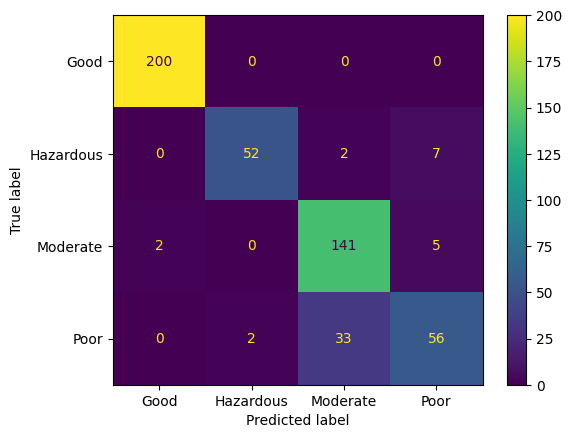

In [5]:
#definindo o modelo com os melhores parâmetros
model = LogisticRegression(random_state=seed, **grid_search.best_params_)

#treinando o modelo
model.fit(X_train, y_train)

#predição
y_pred = model.predict(X_test)

#relatório do classificador
print(classification_report(y_test, y_pred))

#calcula a matriz de confusão de acordo com os parâmetros acima
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)

disp_cm.plot()

plt.show()